# Transfer Learning Approach

In [1]:
import numpy as np
from src.dataloader import read_train, read_val
from src.preprocessing import CustomDataGenerator
import matplotlib.pyplot as plt
import cv2
import skimage

# X_train, y_train = read_train()
X_val, y_val = read_val()

2023-11-27 13:20:50.997997: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 13:20:51.019966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 13:20:51.363870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(300, 300, 3)
1/1 [==============================] - 1s 826ms/step
Predicted: [('n04040759', 'radiator', 0.1194279), ('n03014705', 'chest', 0.10038454), ('n03903868', 'pedestal', 0.09104509)]


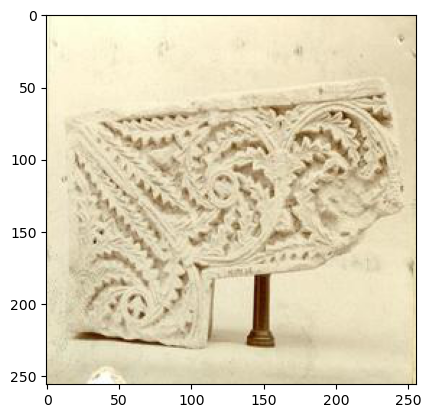

In [11]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

x = skimage.transform.resize(X_val[0] , (224, 224)) * 255
print(x.shape)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(X_val[0])

In [12]:
model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 300, 300, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 300, 300, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 300, 300, 3)          0         ['normalization_2

In [15]:
def predict_image(img):   
    print(img.min(), img.max())
    img_res = cv2.resize(img, (224, 224))
    print(img_res.max(), img_res.min())
    img_res = x = preprocess_input(img)
    img_pred = model.predict(np.expand_dims(img_res, axis=0), verbose=0)
    prediction = decode_predictions(img_pred, top=1)[0][0]
    img_pred_lab = prediction[1]
    img_pred_prob = prediction[2]
    return img_pred_lab, img_pred_prob


234 16
224 0
244 13
254 0
242 21
244 52
255 1
255 2
255 2
245 10
253 12
255 26
234 19
253 54
255 0
236 12
255 0
202 0
255 100
250 0
232 5
253 21
255 19
240 14
253 2
253 37
255 23
235 5
253 7


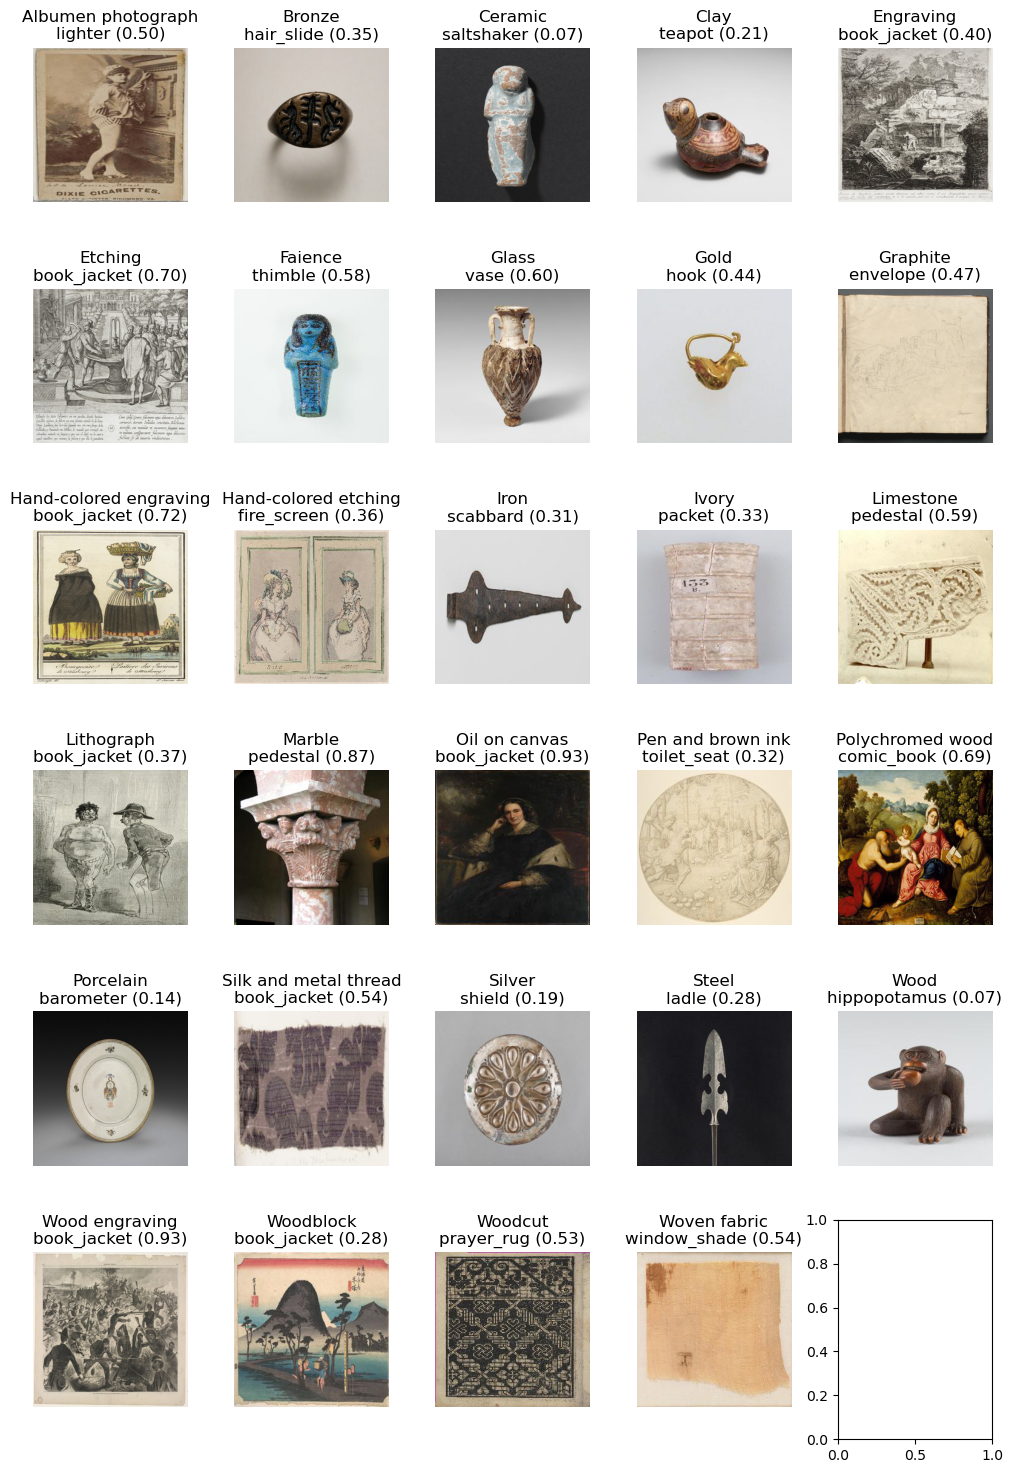

In [14]:
# Select one example from each class in X_val and plot them
import src.config as config
import matplotlib.pyplot as plt

fig, ax = plt.subplots(6, 5, figsize=(10, 15))
ax = ax.ravel()
for i in range(config.N_CLASSES):
    img = X_val[y_val == i][0]
    ax[i].imshow(img)
    label_pred = predict_image(img)
    ax[i].set_title(f"{config.LABELS[i]}\n{label_pred[0]} ({label_pred[1]:.2f})")
    ax[i].set_axis_off()

fig.tight_layout()

In [31]:
from keras.applications.ince import preprocess_input
X_val_resized = preprocess_input(X_val_resized)

In [33]:
y_pred_vgg16 = model.predict(X_val_resized)

46/46 [==============================] - 4s 84ms/step


In [34]:
y_pred_vgg16_lab = np.argmax(y_pred_vgg16, axis=1)
accuracy_vgg16 = np.mean(y_pred_vgg16_lab == y_val)
print(f"Accuracy: {accuracy_vgg16:.4f}")

Accuracy: 0.0345
